In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [10]:
# Read data from CSV files
mapper_GB_data = pd.read_csv('../resources/performance/performance_csv/performance-GB_letterFrequencyCombiner_results.csv')
InMapping_GB_data = pd.read_csv('../resources/performance/performance_csv/performance-GB_letterFrequencyInMapping_results.csv')

mapper_MB_data = pd.read_csv('../resources/performance/performance_csv/performance-MB_letterFrequencyCombiner_results.csv')
InMapping_MB_data = pd.read_csv('../resources/performance/performance_csv/performance-MB_letterFrequencyInMapping_results.csv')

mapper_KB_data = pd.read_csv('../resources/performance/performance_csv/performance-KB_letterFrequencyCombiner_results.csv')
InMapping_KB_data = pd.read_csv('../resources/performance/performance_csv/performance-KB_letterFrequencyInMapping_results.csv')


# Add a column to indicate the phase (mapper or reducer) 
mapper_GB_data['Phase'] = 'Mapper'
InMapping_GB_data['Phase'] = 'InMapping'

mapper_MB_data['Phase'] = 'Mapper'
InMapping_MB_data['Phase'] = 'InMapping'

mapper_KB_data['Phase'] = 'Mapper'
InMapping_KB_data['Phase'] = 'InMapping'


# Merge the dataframes for each file size
combined_GB_data = pd.concat([mapper_GB_data, InMapping_GB_data])

combined_MB_data = pd.concat([mapper_MB_data, InMapping_MB_data])

combined_KB_data = pd.concat([mapper_KB_data, InMapping_KB_data])

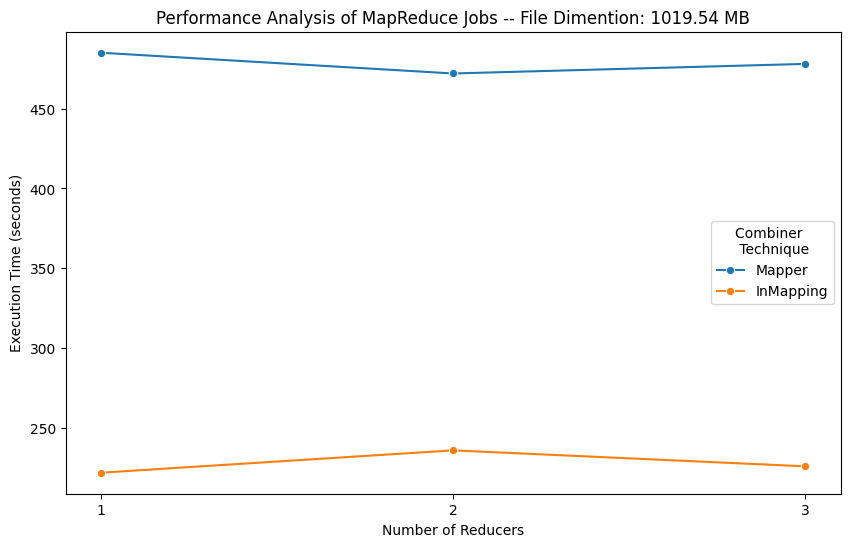

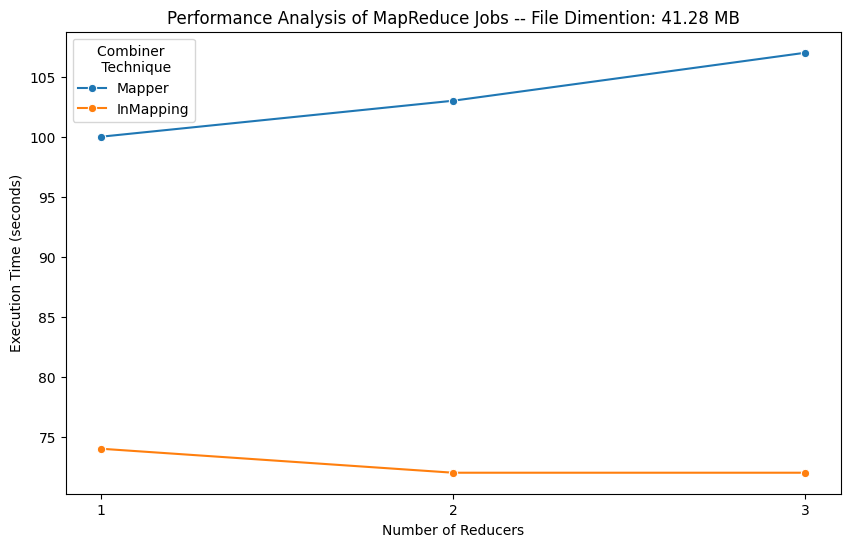

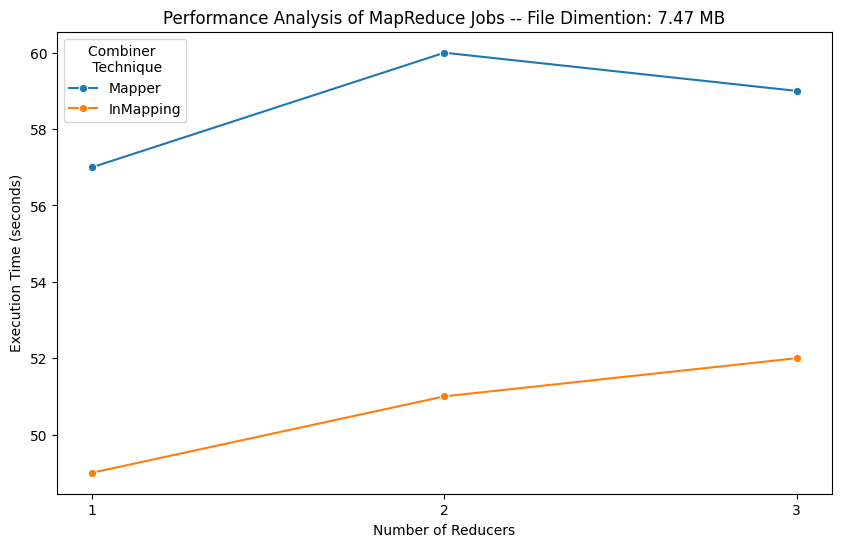

In [11]:
df_collection = [combined_GB_data, combined_MB_data, combined_KB_data]

# Plot the data in three different plots
i = 0
for df in df_collection:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='NumReducers', y='ExecutionTime', data=df, hue='Phase', marker='o')
    if i == 0:
        plt.title('Performance Analysis of MapReduce Jobs -- File Dimention: 1019.54 MB')
    elif i == 1:
        plt.title('Performance Analysis of MapReduce Jobs -- File Dimention: 41.28 MB')
    else:
        plt.title('Performance Analysis of MapReduce Jobs -- File Dimention: 7.47 MB')
    plt.ylabel('Execution Time (s)')
    plt.xlabel('Number of Reducers')
    ax = plt.gca()  # Ottieni l'asse corrente
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Imposta l'asse x per visualizzare solo i valori interi
    plt.legend(title='Combiner \n Technique')
    i += 1
    plt.show()